## INTRODUCTORY STEPS

In [1]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 19.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf
import arch

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


## DATA EXPLORATION AND PREPROCESSING

In [4]:
os.chdir('/content/drive/My Drive/thesis/3rd_presentation')
df = pd.read_csv('monthly_data.csv')

In [5]:
df

,Unnamed: 0,Date,unemployment_rate,inflation_rate,treasury_yield,Monthly Real GDP Index,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG
0,0,2000-01-01,4.0,169.300,NaN,12870.47162,-1.066967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-02-01,4.1,170.000,6.661000,12934.38121,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789
2,2,2000-03-01,4.0,171.000,6.519500,13000.50928,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258
3,3,2000-04-01,3.8,170.900,6.256522,13173.13041,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518
4,4,2000-05-01,4.0,171.200,5.990526,13149.18201,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,278,2023-03-01,3.5,301.808,3.746842,NaN,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813
279,279,2023-04-01,3.4,302.918,3.663043,NaN,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467
280,280,2023-05-01,3.7,NaN,3.460000,NaN,NaN,0.461619,-7.868480,-0.191204,-2.695194,-5.277949,8.487855,-4.382088,-3.967915,-6.161645,-2.237080,-2.162160
281,281,2023-06-01,NaN,NaN,3.573636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nan_ratio = df.isnull().mean()
nan_ratio

Unnamed: 0                0.000000
Date                      0.000000
unemployment_rate         0.007067
inflation_rate            0.010601
treasury_yield            0.003534
Monthly Real GDP Index    0.017668
GDP_growth                0.017668
SP500_return              0.010601
ABBV                      0.565371
AZN                       0.010601
BMY                       0.010601
JNJ                       0.010601
LLY                       0.010601
MRK                       0.010601
NVO                       0.010601
NVS                       0.010601
PFE                       0.010601
ROG                       0.010601
dtype: float64

In [7]:
# drop the NA's from the data frame

df.dropna(subset=['AZN', 'BMY', 'JNJ', 'LLY', 'MRK', 'NVO', 'NVS', 'PFE', 'ROG'], inplace=True)
df = df.reset_index()
df

,index,Unnamed: 0,Date,unemployment_rate,inflation_rate,treasury_yield,Monthly Real GDP Index,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG
0,1,1,2000-02-01,4.1,170.000,6.661000,12934.38121,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789
1,2,2,2000-03-01,4.0,171.000,6.519500,13000.50928,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258
2,3,3,2000-04-01,3.8,170.900,6.256522,13173.13041,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518
3,4,4,2000-05-01,4.0,171.200,5.990526,13149.18201,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265
4,5,5,2000-06-01,4.0,172.200,6.440455,13189.36127,0.305565,1.728613,NaN,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,276,276,2023-01-01,3.4,300.536,3.616190,20283.65522,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326
276,277,277,2023-02-01,3.6,301.648,3.531500,20193.96427,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681
277,278,278,2023-03-01,3.5,301.808,3.746842,NaN,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813
278,279,279,2023-04-01,3.4,302.918,3.663043,NaN,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467


In [8]:
df = df.drop(columns=['index', 'Unnamed: 0', 'Monthly Real GDP Index'], axis=1)
df

,Date,unemployment_rate,inflation_rate,treasury_yield,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG
0,2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,NaN,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326
276,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681
277,2023-03-01,3.5,301.808,3.746842,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813
278,2023-04-01,3.4,302.918,3.663043,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467


In [9]:
# we now take the first differnece to get the series stationary
df['inflation_change'] = df['inflation_rate'] - df['inflation_rate'].shift(1)
df['unemp_change'] = df['unemployment_rate'] - df['unemployment_rate'].shift(1)
df['treasury_yield_change'] = df['treasury_yield'] - df['treasury_yield'].shift(1)

df

,Date,unemployment_rate,inflation_rate,treasury_yield,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
0,2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,NaN,NaN,NaN
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,NaN,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
276,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
277,2023-03-01,3.5,301.808,3.746842,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342
278,2023-04-01,3.4,302.918,3.663043,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467,1.110,-0.1,-0.083799


In [10]:
nan_ratio = df.isnull().mean()
nan_ratio

Date                     0.000000
unemployment_rate        0.000000
inflation_rate           0.003571
treasury_yield           0.000000
GDP_growth               0.010714
SP500_return             0.000000
ABBV                     0.560714
AZN                      0.000000
BMY                      0.000000
JNJ                      0.000000
LLY                      0.000000
MRK                      0.000000
NVO                      0.000000
NVS                      0.000000
PFE                      0.000000
ROG                      0.000000
inflation_change         0.007143
unemp_change             0.003571
treasury_yield_change    0.003571
dtype: float64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.set_index('Date', inplace=True)

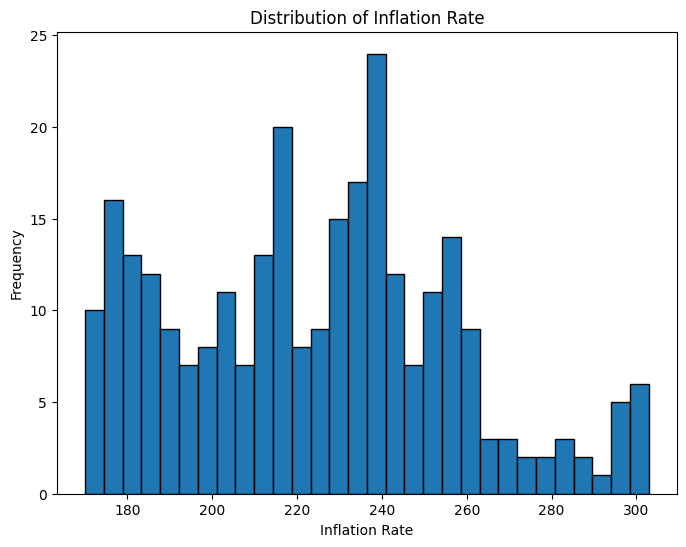

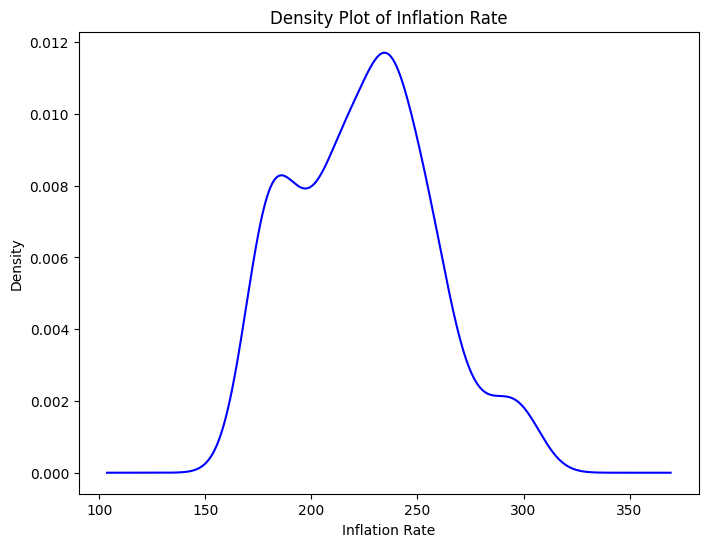

In [13]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['inflation_rate'], bins=30, edgecolor='black')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Inflation Rate')
plt.show()

# Plot density plot
plt.figure(figsize=(8, 6))
df['inflation_rate'].plot(kind='density', color='blue')
plt.xlabel('Inflation Rate')
plt.ylabel('Density')
plt.title('Density Plot of Inflation Rate')
plt.show()


In [14]:
mean_infl = df['inflation_rate'].mean()
std_infl = df['inflation_rate'].std()
skew_infl = df['inflation_rate'].skew()
kurt_infl = df['inflation_rate'].kurtosis()

print("Mean:", mean_infl)
print("Standard Deviation:", std_infl)
print("Skewness:", skew_infl)
print("Kurtosis:", kurt_infl)


Mean: 224.34536559139784
Standard Deviation: 32.429710015669194
Skewness: 0.27560409450751766
Kurtosis: -0.4846561926332269


In [15]:
#we should decide if to include as well the monthly inflation rate

df.rename(columns={'inflation_rate': 'CPI'}, inplace=True)
df

,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
Date,,,,,,,,,,,,,,,,,,
2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,NaN,NaN,NaN
2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,NaN,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
2023-03-01,3.5,301.808,3.746842,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342


Handling remaining missing values:

In [16]:
# dropping abbv because of nans and imputing NANs in the macros change ratio
non_nan_df = df.copy()
non_nan_df = non_nan_df.drop('ABBV', axis=1)
non_nan_df['inflation_change'] = non_nan_df['inflation_change'].bfill()
non_nan_df['unemp_change'] = non_nan_df['unemp_change'].bfill()
non_nan_df['treasury_yield_change'] = non_nan_df['treasury_yield_change'].bfill()
# will treat abbv separately

In [17]:
non_nan_df

,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
Date,,,,,,,,,,,,,,,,,
2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,1.000,-0.1,-0.141500
2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
2023-03-01,3.5,301.808,3.746842,NaN,3.313488,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342


got from internet: 
- *The Consumer Price Index for All Urban Consumers (CPI-U) rose 0.1 percent to 304.127 in May on a seasonally adjusted basis, after increasing 0.4 percent in April* : https://tradingeconomics.com/united-states/consumer-price-index-cpi

In [18]:
non_nan_df.loc[non_nan_df.index == '2023-05-01', 'CPI'] = 304.127

In [19]:
non_nan_df.loc['2023-05-01', 'inflation_change'] = 0.1

In [20]:
non_nan_df

,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
Date,,,,,,,,,,,,,,,,,
2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,1.000,-0.1,-0.141500
2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
2023-03-01,3.5,301.808,3.746842,NaN,3.313488,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342


In [21]:
non_nan_4 = non_nan_df.copy()

In [22]:
non_nan_4['GDP_growth'] = pd.to_numeric(non_nan_4['GDP_growth'], errors='coerce')

In [23]:
non_nan_4['GDP_growth'] = non_nan_4['GDP_growth'].interpolate(method='linear', limit_direction='both')
non_nan_4

,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
Date,,,,,,,,,,,,,,,,,
2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,1.000,-0.1,-0.141500
2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
2023-03-01,3.5,301.808,3.746842,-0.442183,3.313488,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342


In [24]:
# filling it with 0 since couldnt decide what to do with them 
#non_nan_df['GDP_growth'].fillna(0, inplace=True)
#non_nan_df

In [25]:
non_nan_4.to_csv('non_nan_4.csv', index=True)

In [26]:
non_nan_ratio = non_nan_4.isnull().sum()
non_nan_ratio

unemployment_rate        0
CPI                      0
treasury_yield           0
GDP_growth               0
SP500_return             0
AZN                      0
BMY                      0
JNJ                      0
LLY                      0
MRK                      0
NVO                      0
NVS                      0
PFE                      0
ROG                      0
inflation_change         0
unemp_change             0
treasury_yield_change    0
dtype: int64

## DEFINING THE MODEL EVALUATION FUNCTIONS:

In [27]:
import pandas as pd
import numpy as np

def tick_loss(alpha, returns, var):
    df = pd.DataFrame({'Return': returns, 'VaR': var})
    df['Indicator'] = np.where(df['Return'] < df['VaR'], 1, 0)
    
    t_loss = 0

    for i in df.index:
        t_loss += (alpha * (df['Return'][i] - df['VaR'][i]) * (1 - df['Indicator'][i]) + 
                 (1 - alpha) * (df['VaR'][i] - df['Return'][i]) * df['Indicator'][i])

    return t_loss

change this for garch!!!

In [28]:
def get_historical_quantiles(df, column_names, alpha):


  percentile_1 = df[column_names].quantile(alpha)
 

  return percentile_1

In [29]:

from statsmodels.tsa.stattools import grangercausalitytests

def granger_causality_test(data, target_col, feature_col, max_lag):
    results = grangercausalitytests(data[[target_col, feature_col]], max_lag, verbose=False)
    p_values = [round(results[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lag)]
    return p_values

def find_optimal_lags(data, target_col, feature_cols, max_lag, significance_level=0.05):
    lag_p_values = {}
    for feature_col in feature_cols:
        p_values = granger_causality_test(data, target_col, feature_col, max_lag)
        significant_lags = [i + 1 for i, p_value in enumerate(p_values) if p_value < significance_level]
        lag_p_values[feature_col] = significant_lags
    return lag_p_values

## STATISTICAL ANALYSIS

fer anàlisis de efectes de variables macro sobre each target per veure quina incloc per cada model? 

# GARCH

Posar en comú el preprocessing: what to do with ABBV? and with NANs of macros?
què han fet amb els NANs resultants dels lags?

### 1 month ahead 
crear columna target i columna ticker, lag 1 de totes les features + lag de target

In [27]:
one_month_df = non_nan_4.copy()

In [28]:
one_month_df

,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
Date,,,,,,,,,,,,,,,,,
2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,1.000,-0.1,-0.141500
2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
2023-03-01,3.5,301.808,3.746842,-0.442183,3.313488,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342


In [29]:
one_month_df.reset_index(inplace=True)
one_month_df

,Date,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
0,2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,1.000,-0.1,-0.141500
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
276,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
277,2023-03-01,3.5,301.808,3.746842,-0.442183,3.313488,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342
278,2023-04-01,3.4,302.918,3.663043,-0.442183,1.985238,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467,1.110,-0.1,-0.083799


In [30]:
tickers = ['AZN', 'BMY', 'JNJ', 'LLY', 'MRK', 'NVO', 'NVS', 'PFE', 'ROG']
covs = ['Date', 'unemployment_rate', 'CPI', 'treasury_yield', 'GDP_growth', 'SP500_return', 'inflation_change',	'unemp_change',	'treasury_yield_change']

In [31]:
dfs = []

for t in tickers:
  df = one_month_df[covs]
  df['target'] = one_month_df[t]
  df['ticker'] = t
  dfs.append(df)

final_data = pd.concat(dfs)
final_data = final_data.reset_index(drop=True)
final_data

<ipython-input-31-b11f2f5ba046>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = one_month_df[t]
<ipython-input-31-b11f2f5ba046>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ticker'] = t
<ipython-input-31-b11f2f5ba046>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,Date,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,inflation_change,unemp_change,treasury_yield_change,target,ticker
0,2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,1.000,-0.1,-0.141500,-12.828964,AZN
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,1.000,-0.1,-0.141500,22.264136,AZN
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,-0.100,-0.2,-0.262978,5.567379,AZN
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,0.300,0.2,-0.265995,-0.148357,AZN
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,1.000,0.0,0.449928,10.549735,AZN
...,...,...,...,...,...,...,...,...,...,...,...
2515,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,1.546,-0.1,-0.274810,16.968326,ROG
2516,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,1.112,0.2,-0.084690,5.451681,ROG
2517,2023-03-01,3.5,301.808,3.746842,-0.442183,3.313488,0.160,-0.1,0.215342,11.025813,ROG
2518,2023-04-01,3.4,302.918,3.663043,-0.442183,1.985238,1.110,-0.1,-0.083799,-1.517467,ROG


In [32]:
final_data1 = final_data.copy()

In [33]:
# creating the lag 1 for the macros

macro_vars = ['unemployment_rate', 'CPI', 'treasury_yield', 'GDP_growth', 'SP500_return', 'inflation_change', 'unemp_change', 'treasury_yield_change']

lagged_vars = [var + '_lag1' for var in macro_vars]
final_data1[lagged_vars] = final_data1[macro_vars].shift(1)
final_data1.loc[:, lagged_vars] = final_data1.loc[:, lagged_vars].bfill()

final_data1

,Date,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,inflation_change,unemp_change,treasury_yield_change,target,ticker,unemployment_rate_lag1,CPI_lag1,treasury_yield_lag1,GDP_growth_lag1,SP500_return_lag1,inflation_change_lag1,unemp_change_lag1,treasury_yield_change_lag1
0,2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,1.000,-0.1,-0.141500,-12.828964,AZN,4.1,170.000,6.661000,0.496560,-1.522563,1.000,-0.1,-0.141500
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,1.000,-0.1,-0.141500,22.264136,AZN,4.1,170.000,6.661000,0.496560,-1.522563,1.000,-0.1,-0.141500
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,-0.100,-0.2,-0.262978,5.567379,AZN,4.0,171.000,6.519500,0.511258,9.413333,1.000,-0.1,-0.141500
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,0.300,0.2,-0.265995,-0.148357,AZN,3.8,170.900,6.256522,1.327803,-3.266805,-0.100,-0.2,-0.262978
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,1.000,0.0,0.449928,10.549735,AZN,4.0,171.200,5.990526,-0.181797,-1.572223,0.300,0.2,-0.265995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,1.546,-0.1,-0.274810,16.968326,ROG,3.5,298.990,3.891000,-0.085161,-6.193593,0.392,-0.1,-0.092500
2516,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,1.112,0.2,-0.084690,5.451681,ROG,3.4,300.536,3.616190,0.390254,6.776820,1.546,-0.1,-0.274810
2517,2023-03-01,3.5,301.808,3.746842,-0.442183,3.313488,0.160,-0.1,0.215342,11.025813,ROG,3.6,301.648,3.531500,-0.442183,-2.514271,1.112,0.2,-0.084690
2518,2023-04-01,3.4,302.918,3.663043,-0.442183,1.985238,1.110,-0.1,-0.083799,-1.517467,ROG,3.5,301.808,3.746842,-0.442183,3.313488,0.160,-0.1,0.215342


In [34]:
final_data1['target_lag1'] = final_data1['target'].shift(1)
final_data1.dropna(subset=['target_lag1'], inplace=True)

final_data1

,Date,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,inflation_change,unemp_change,treasury_yield_change,target,ticker,unemployment_rate_lag1,CPI_lag1,treasury_yield_lag1,GDP_growth_lag1,SP500_return_lag1,inflation_change_lag1,unemp_change_lag1,treasury_yield_change_lag1,target_lag1
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,1.000,-0.1,-0.141500,22.264136,AZN,4.1,170.000,6.661000,0.496560,-1.522563,1.000,-0.1,-0.141500,-12.828964
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,-0.100,-0.2,-0.262978,5.567379,AZN,4.0,171.000,6.519500,0.511258,9.413333,1.000,-0.1,-0.141500,22.264136
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,0.300,0.2,-0.265995,-0.148357,AZN,3.8,170.900,6.256522,1.327803,-3.266805,-0.100,-0.2,-0.262978,5.567379
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,1.000,0.0,0.449928,10.549735,AZN,4.0,171.200,5.990526,-0.181797,-1.572223,0.300,0.2,-0.265995,-0.148357
5,2000-07-01,4.0,172.700,6.097273,-0.653855,-1.338453,0.500,0.0,-0.343182,-8.064479,AZN,4.0,172.200,6.440455,0.305565,1.728613,1.000,0.0,0.449928,10.549735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,1.546,-0.1,-0.274810,16.968326,ROG,3.5,298.990,3.891000,-0.085161,-6.193593,0.392,-0.1,-0.092500,9.446071
2516,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,1.112,0.2,-0.084690,5.451681,ROG,3.4,300.536,3.616190,0.390254,6.776820,1.546,-0.1,-0.274810,16.968326
2517,2023-03-01,3.5,301.808,3.746842,-0.442183,3.313488,0.160,-0.1,0.215342,11.025813,ROG,3.6,301.648,3.531500,-0.442183,-2.514271,1.112,0.2,-0.084690,5.451681
2518,2023-04-01,3.4,302.918,3.663043,-0.442183,1.985238,1.110,-0.1,-0.083799,-1.517467,ROG,3.5,301.808,3.746842,-0.442183,3.313488,0.160,-0.1,0.215342,11.025813


In [35]:
split_date = '2022-05-01'
train_df1 = final_data1[final_data1['Date'] <= split_date]
test_df1 = final_data1[final_data1['Date'] > split_date]

In [36]:
train_df1

,Date,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,inflation_change,unemp_change,treasury_yield_change,target,ticker,unemployment_rate_lag1,CPI_lag1,treasury_yield_lag1,GDP_growth_lag1,SP500_return_lag1,inflation_change_lag1,unemp_change_lag1,treasury_yield_change_lag1,target_lag1
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,1.000,-0.1,-0.141500,22.264136,AZN,4.1,170.000,6.661000,0.496560,-1.522563,1.000,-0.1,-0.141500,-12.828964
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,-0.100,-0.2,-0.262978,5.567379,AZN,4.0,171.000,6.519500,0.511258,9.413333,1.000,-0.1,-0.141500,22.264136
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,0.300,0.2,-0.265995,-0.148357,AZN,3.8,170.900,6.256522,1.327803,-3.266805,-0.100,-0.2,-0.262978,5.567379
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,1.000,0.0,0.449928,10.549735,AZN,4.0,171.200,5.990526,-0.181797,-1.572223,0.300,0.2,-0.265995,-0.148357
5,2000-07-01,4.0,172.700,6.097273,-0.653855,-1.338453,0.500,0.0,-0.343182,-8.064479,AZN,4.0,172.200,6.440455,0.305565,1.728613,1.000,0.0,0.449928,10.549735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,2022-01-01,4.0,282.599,1.465000,-0.688207,-4.941333,1.712,0.1,-0.094500,-0.018311,ROG,3.9,280.887,1.559500,0.332455,4.258490,2.176,-0.3,-0.023000,0.139390
2504,2022-02-01,3.8,284.610,1.764000,0.168413,-2.951702,2.011,-0.2,0.299000,0.018314,ROG,4.0,282.599,1.465000,-0.688207,-4.941333,1.712,0.1,-0.094500,-0.018311
2505,2022-03-01,3.6,287.472,1.934211,-0.017212,3.437690,2.862,-0.2,0.170211,-0.476186,ROG,3.8,284.610,1.764000,0.168413,-2.951702,2.011,-0.2,0.299000,0.018314
2506,2022-04-01,3.6,288.611,2.127826,-0.351719,-8.493505,1.139,0.0,0.193616,-0.360696,ROG,3.6,287.472,1.934211,-0.017212,3.437690,2.862,-0.2,0.170211,-0.476186


In [37]:
test_df1

,Date,unemployment_rate,CPI,treasury_yield,GDP_growth,SP500_return,inflation_change,unemp_change,treasury_yield_change,target,ticker,unemployment_rate_lag1,CPI_lag1,treasury_yield_lag1,GDP_growth_lag1,SP500_return_lag1,inflation_change_lag1,unemp_change_lag1,treasury_yield_change_lag1,target_lag1
268,2022-06-01,3.6,294.728,2.898095,-0.040969,-8.640685,3.460,0.0,0.150595,-0.616736,AZN,3.6,291.268,2.747500,0.265432,0.225724,2.657,0.0,0.619674,0.120491
269,2022-07-01,3.5,294.628,3.143333,-0.055331,9.680490,-0.100,-0.1,0.245238,0.242173,AZN,3.6,294.728,2.898095,-0.040969,-8.640685,3.460,0.0,0.150595,-0.616736
270,2022-08-01,3.7,295.320,2.896000,1.519261,-4.080190,0.692,0.2,-0.247333,-5.813079,AZN,3.5,294.628,3.143333,-0.055331,9.680490,-0.100,-0.1,0.245238,0.242173
271,2022-09-01,3.5,296.539,2.897826,-0.642161,-9.615878,1.219,-0.2,0.001826,-11.466275,AZN,3.7,295.320,2.896000,1.519261,-4.080190,0.692,0.2,-0.247333,-5.813079
272,2022-10-01,3.7,297.987,3.519048,0.280228,8.571722,1.448,0.2,0.621222,7.239243,AZN,3.5,296.539,2.897826,-0.642161,-9.615878,1.219,-0.2,0.001826,-11.466275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,1.546,-0.1,-0.274810,16.968326,ROG,3.5,298.990,3.891000,-0.085161,-6.193593,0.392,-0.1,-0.092500,9.446071
2516,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,1.112,0.2,-0.084690,5.451681,ROG,3.4,300.536,3.616190,0.390254,6.776820,1.546,-0.1,-0.274810,16.968326
2517,2023-03-01,3.5,301.808,3.746842,-0.442183,3.313488,0.160,-0.1,0.215342,11.025813,ROG,3.6,301.648,3.531500,-0.442183,-2.514271,1.112,0.2,-0.084690,5.451681
2518,2023-04-01,3.4,302.918,3.663043,-0.442183,1.985238,1.110,-0.1,-0.083799,-1.517467,ROG,3.5,301.808,3.746842,-0.442183,3.313488,0.160,-0.1,0.215342,11.025813


In [39]:
import pandas as pd
import numpy as np
import arch

def one_step_ahead_VaR(data, tickers, lagged_covs, lagged_tickers, alpha, t):
    VaR_forecasts = {}
    losses = {}
    
    for ticker in tickers:
        lagged_tickers_ticker = [tick for tick in lagged_tickers if tick.startswith(f'{ticker}_lag')]
        
        # Prepare the data
        train_data = data.loc[:t]
        test_data = data.loc[t:]
        
        # Specify the regressors and dependent variable
        X_train = train_data[lagged_covs + lagged_tickers_ticker]
        y_train = train_data[ticker]
        
        # Fit the GARCH(1, 1) model
        garch_model = arch.arch_model(y_train, x=X_train, vol='Garch', p=1, q=1)
        garch_model_result = garch_model.fit()
        
        # Obtain the predicted conditional volatility for t+h
        X_test = test_data[lagged_covs + lagged_tickers_ticker]
        conditional_volatility = garch_model_result.conditional_volatility
        VaR_forecast = conditional_volatility * np.percentile(garch_model_result.resid / conditional_volatility, alpha * 100)
        
        # Compute loss
        r = test_data[ticker]
        loss = tick_loss(alpha, r, VaR_forecast)
        
        VaR_forecasts[ticker] = VaR_forecast
        losses[ticker] = loss
    
    return VaR_forecasts, losses

In [ ]:
lagged_covs = ['unemployment_rate_lag1',	'CPI_lag1',	'treasury_yield_lag1',	'GDP_growth_lag1',	'SP500_return_lag1', 'inflation_change_lag1',	'unemp_change_lag1',	'treasury_yield_change_lag1']
lagged_tickers = 

In [ ]:
alpha = 0.05
t = 267
VaR_forecasts, losses = one_step_ahead_VaR(final_data1, tickers, lagged_covs, lagged_tickers, alpha, t)

# Access VaR forecasts and losses
for ticker in tickers:
    print(f'Ticker: {ticker}')
    print('VaR forecast:', VaR_forecasts[ticker])
    print('Loss:', losses[ticker])
    print('---')

In [50]:
import pandas as pd
import numpy as np
import arch

# Step 1: Split the data into regressors and dependent variable
regressors = train_df1[['unemployment_rate_lag1', 'CPI_lag1', 'treasury_yield_lag1', 'GDP_growth_lag1',
                        'SP500_return_lag1', 'inflation_change_lag1', 'unemp_change_lag1',
                        'treasury_yield_change_lag1', 'target_lag1']]
dependent_variable = train_df1['target']

# Step 2: Fit the GARCH(1, 1) model
garch_model = arch.arch_model(dependent_variable, x=regressors, vol='Garch', p=1, q=1)
garch_model_result = garch_model.fit()

# Step 3: Obtain the predicted conditional volatility
conditional_volatility = garch_model_result.conditional_volatility

# Step 4: Calculate the predicted VaR at the 5% quantile
alpha = 0.05
standardized_residuals = garch_model_result.resid / conditional_volatility
z_value = np.percentile(standardized_residuals, alpha * 100)
predicted_var = conditional_volatility * z_value

# Step 5: Calculate the tick loss
def tick_loss(alpha, returns, var):
    df = pd.DataFrame({'Return': returns, 'VaR': var})
    df['Indicator'] = np.where(df['Return'] < df['VaR'], 1, 0)
    
    t_loss = 0
    
    for i in df.index:
        t_loss += (alpha * (df['Return'][i] - df['VaR'][i]) * (1 - df['Indicator'][i]) +
                   (1 - alpha) * (df['VaR'][i] - df['Return'][i]) * df['Indicator'][i])
    
    return t_loss

tick_loss_value = tick_loss(alpha, dependent_variable, -predicted_var)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13877.166542549836
Iteration:      2,   Func. Count:     13,   Neg. LLF: 343006308.0961792
Iteration:      3,   Func. Count:     19,   Neg. LLF: 8108.753977263732
Iteration:      4,   Func. Count:     25,   Neg. LLF: 8006.721336320135
Iteration:      5,   Func. Count:     31,   Neg. LLF: 8057.90165397137
Iteration:      6,   Func. Count:     37,   Neg. LLF: 8534.104021168954
Iteration:      7,   Func. Count:     45,   Neg. LLF: 8000.196416964543
Iteration:      8,   Func. Count:     51,   Neg. LLF: 8000.064405337626
Iteration:      9,   Func. Count:     56,   Neg. LLF: 8000.064397720495
Iteration:     10,   Func. Count:     60,   Neg. LLF: 8000.064397719689
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8000.064397720495
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


In [51]:
-predicted_var

1       14.751370
2       17.205238
3       16.570282
4       15.843958
5       15.777805
          ...    
2503    21.544729
2504    20.552701
2505    19.612116
2506    18.728013
2507    17.889018
Name: cond_vol, Length: 2411, dtype: float64

In [54]:
predicted_var

1      -14.751370
2      -17.205238
3      -16.570282
4      -15.843958
5      -15.777805
          ...    
2503   -21.544729
2504   -20.552701
2505   -19.612116
2506   -18.728013
2507   -17.889018
Name: cond_vol, Length: 2411, dtype: float64

In [56]:
ticker = 'NVS'

# Step 1: Identify indices for the ticker 'NVS' in the test set
nvs_indices = test_df1[test_df1['ticker'] == ticker].index

# Step 2: Extract target values for the ticker 'NVS' from the test set
target_values = test_df1.loc[nvs_indices, 'target']

# Step 3: Reset the indices of predicted_var to match test_df1
predicted_var_reset = predicted_var.reset_index(drop=True)

# Step 4: Retrieve predicted_var values for the ticker 'NVS'
predicted_var_values = predicted_var_reset[nvs_indices]

# Step 5: Calculate the tick loss specifically for the ticker 'NVS'
alpha = 0.05
t_loss = tick_loss(alpha, target_values, -predicted_var_values)


In [57]:
t_loss

112.76647220551064

In [58]:
def tick_loss(returns, var):
    df = pd.DataFrame({'Return': returns, 'VaR': var})
    df['Indicator'] = np.where(df['Return'] < df['VaR'], 1, 0)
    
    t_loss = (alpha * (df['Return'] - df['VaR']) * (1 - df['Indicator']) +
              (1 - alpha) * (df['VaR'] - df['Return']) * df['Indicator'])
    
    return df, t_loss

In [60]:
alpha = 0.05

# Calculate the tick loss and obtain the dataframe and t_loss value
NVS_1m, t_loss_NVS_1m = tick_loss(target_values, predicted_var_values)

print(NVS_1m)
print(t_loss_NVS_1m)

         Return        VaR  Indicator
1948  -7.048606 -11.001271          0
1949   1.537918 -10.823600          0
1950  -6.186653 -10.415245          0
1951  -5.601082 -10.628334          0
1952   6.735944 -10.235695          0
1953  10.390734 -10.837805          0
1954   1.295221 -10.681019          0
1955  -0.110227 -10.360925          0
1956  -7.172811 -10.496238          0
1957   9.367574 -10.151835          0
1958  16.334413 -10.162491          0
1959  -6.161645  -9.791111          0
1948    0.197633
1949    0.618076
1950    0.211430
1951    0.251363
1952    0.848582
1953    1.061427
1954    0.598812
1955    0.512535
1956    0.166171
1957    0.975970
1958    1.324845
1959    0.181473
dtype: float64


In [61]:
def tick_loss(alpha, returns, var, ticker):
    df = pd.DataFrame({'Return': returns, 'VaR': var, 'Ticker': ticker})
    ticker_df = df[df['Ticker'] == ticker]
    ticker_df['Indicator'] = np.where(ticker_df['Return'] < ticker_df['VaR'], 1, 0)
    
    t_loss = 0
    
    for i in ticker_df.index:
        t_loss += (alpha * (ticker_df['Return'][i] - ticker_df['VaR'][i]) * (1 - ticker_df['Indicator'][i]) +
                 (1 - alpha) * (ticker_df['VaR'][i] - ticker_df['Return'][i]) * ticker_df['Indicator'][i])
    
    return t_loss

In [63]:
def tick_loss(alpha, returns, var):
    df = pd.DataFrame({'Return': returns, 'VaR': var})
    df['Indicator'] = np.where(df['Return'] < df['VaR'], 1, 0)
    
    t_loss = 0
    
    for i in df.index:
        t_loss += (alpha * (df['Return'][i] - df['VaR'][i]) * (1 - df['Indicator'][i]) +
                   (1 - alpha) * (df['VaR'][i] - df['Return'][i]) * df['Indicator'][i])
    
    return t_loss


def calculate_tick_loss(ticker, alpha, test_df, predicted_var):
    # Step 1: Identify indices for the specified ticker in the test set
    ticker_indices = test_df[test_df['ticker'] == ticker].index
    
    # Step 2: Extract target values for the specified ticker from the test set
    target_values = test_df.loc[ticker_indices, 'target']
    
    # Step 3: Reset the indices of predicted_var to match test_df
    predicted_var_reset = predicted_var.reset_index(drop=True)
    
    # Step 4: Retrieve predicted_var values for the specified ticker
    predicted_var_values = predicted_var_reset.loc[ticker_indices]
    
    # Step 5: Calculate the tick loss specifically for the specified ticker
    t_loss = tick_loss(alpha, target_values, -predicted_var_values)
    
    return t_loss


# Specify the ticker and alpha value
ticker = 'NVS'
alpha = 0.05

# Calculate the tick loss for the specified ticker
t_loss = calculate_tick_loss(ticker, alpha, test_df1, predicted_var)

print(t_loss)


112.76647220551064


In [ ]:
tick_loss_value = tick_loss(alpha, returns, var, 'NVS')
print(tick_loss_value)

In [52]:
"""agg = test_df1[test_df1['ticker'] == 'NVS']
r = agg['target'].values
r = pd.Series(r)"""

In [53]:
NVS_1m_loss = tick_loss(0.05, r, -predicted_var)
print(NVS_1m_loss)

nan


3 months ahead: lag 1, lag 2 i lag 3 de les features

6 months ahead

9 months ahead

12 months ahead

In [32]:
def garch_performance(data, ticker, alpha, period):
    # Train and Test Split
    train_df = data.loc[data.index < '2022-05-01']
    test_df = data.loc[data.index >= '2022-05-01']

    # Extract Dependent Variable (Ticker Returns) and Explanatory Variables (Macro Variables)
    ticker_returns = train_df[ticker]
    macro_variables = train_df.drop(columns=[ticker])

    # Fit GARCH Model
    garch_model = arch.arch_model(ticker_returns, x=macro_variables, mean='Constant', vol='Garch', p=1, q=1)
    garch_fit = garch_model.fit(disp='off')
    conditional_volatility = garch_fit.conditional_volatility

    # Calculate VaR using the GARCH model
    predicted_var = garch_fit.conditional_volatility[-period:]

    # Calculate Tick Loss
    tick_loss_value = tick_loss(alpha, test_df[ticker], predicted_var)

    return tick_loss_value

In [33]:
nvs_m_loss = garch_performance(non_nan_df, 'NVS', 0.05, 12)
print(f'NVS: {nvs_m_loss}')

NVS: nan


In [34]:
nvs_m_loss = garch_performance(non_nan_df, 'AZN', 0.05, 12)
print(f'AZN: {nvs_m_loss}')

AZN: nan
